In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import plotly.graph_objects as go

In [15]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20lob_lobbying.htm
columns_lob_lobbying = ['uniqid', 'registrant_raw', 'registrant', 'isfirm', 
                     'client_raw', 'client', 'ultorg', 'amount', 'cid', 'catcode'
                     'source', 'self', 'includensfs', 'use', 'ind', 'year',
                     'type', 'typelong', 'affiliate']

columns_lob_lobbying = dict(enumerate(columns_lob_lobbying))

df_lobbying = pd.read_csv('../../data/open_secrets/Lobby/lob_lobbying.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_lobbying = df_lobbying.rename(columns=columns_lob_lobbying)
df_lobbying = df_lobbying.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)

/var/folders/g1/9sc25jzn7fdgvxb50169_b9m0000gn/T/ipykernel_22736/3327076248.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lobbying = pd.read_csv('../../data/open_secrets/Lobby/lob_lobbying.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')


In [16]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20lob_indus.htm
columns_lob_indus = ['client', 'sub', 'total', 'year', 'catcode']
columns_lob_indus = dict(enumerate(columns_lob_indus))

df_indus = pd.read_csv('../../data/open_secrets/Lobby/lob_indus.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_indus = df_indus.rename(columns=columns_lob_indus)
df_indus = df_indus.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)

In [17]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20lob_agency.htm
columns_lob_agency = ['uniqid', 'agencyid', 'agency']
columns_lob_agency = dict(enumerate(columns_lob_agency))

df_agency = pd.read_csv('../../data/open_secrets/Lobby/lob_agency.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_agency = df_agency.rename(columns=columns_lob_agency)
df_agency = df_agency.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)

In [18]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20lob_issues.htm
columns_lob_issue = ['si_id', 'uniqid', 'issueid', 'issue', 'specificissue', 5, 6, 7, 8, 9, 10, 'year']
columns_lob_issue = dict(enumerate(columns_lob_issue))

df_issue = pd.read_csv('../../data/open_secrets/Lobby/lob_issue.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_issue = df_issue.rename(columns=columns_lob_issue)
df_issue = df_issue.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)

/var/folders/g1/9sc25jzn7fdgvxb50169_b9m0000gn/T/ipykernel_22736/101186058.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_issue = pd.read_csv('../../data/open_secrets/Lobby/lob_issue.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')


In [19]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20lob_lobbyists.htm
columns_lob_lobbyist = ['uniqid', 'lobbyist_lastname_std', 'lobbyist_firstname_std', 'lobbyist_lastname_raw', 
                     'lobbyist_firstname_raw', 'lobbyist_id', 'year', 'officialposition', 'cid', 'formercongmem']

columns_lob_lobbyist = dict(enumerate(columns_lob_lobbyist))

df_lobbyist = pd.read_csv('../../data/open_secrets/Lobby/lob_lobbyist.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_lobbyist = df_lobbyist.rename(columns=columns_lob_lobbyist)
df_lobbyist = df_lobbyist.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)

In [20]:
defense_code = "D3000"
year = '2020'
defense = df_indus[(df_indus['catcode'] == defense_code) & (df_indus['year'] == year)]
defense.head()

,client,sub,total,year,catcode
491,Leonardo SpA,Selex Galileo Inc,10000,2020,D3000
1407,North Star Scientific,North Star Scientific,80000,2020,D3000
10852,Anduril Industries,Anduril Industries,550000,2020,D3000
12635,Cerberus Capital Management,Sparton Corp,120000,2020,D3000
19797,Management Services Group,Global Technical Systems,120000,2020,D3000


In [39]:
#match clients to master lobbying table

clients = defense["client"].unique()
#test set
clients = clients

#match on parent org
def_lobbying = df_lobbying[df_lobbying['ultorg'].isin(clients)]
def_lobbying.head()
def_lobbying = def_lobbying[def_lobbying["ultorg"] != "North Star Scientific"]

print("Not found in lobbying table: ", set(clients) - set(def_lobbying["ultorg"].unique()))
print("Found in lobbying table: ", set(clients).intersection(set(def_lobbying["ultorg"].unique())))

Not found in lobbying table:  {'S12 Technologies', 'North Star Scientific'}
Found in lobbying table:  {'Shield AI', 'Camgian Microsystems', 'BE Meyers & Co', 'IERUS Technologies', 'Cerberus Capital Management', 'Smartronix Inc', 'General Atomics', 'Ensco Inc', 'Scientific Research Corp', 'Advanced Acoustic Concepts', 'Marotta Controls', 'Advent International', 'Kongsberg Gruppen', 'Raytheon Technologies', 'Thales Group', 'SparkCognition', 'Comrod Inc', 'Howell Laboratories', 'Mercer Engineering Research Center', 'Israel Aerospace Industries', 'Mikros Systems', 'L3Harris Technologies', 'PeopleTec Inc', 'Aspen Systems', 'Curtiss-Wright Corp', 'Accipiter Systems', 'Ultra Electronics', 'Elbit Systems', 'Scientific Systems Co', 'TCOM LP', 'Cubic Corp', 'Anduril Industries', 'Benchmark Electronics', 'Association of Old Crows', 'Leonardo SpA', 'Management Services Group', 'Saab AB'}


In [40]:
#match on lobbyist - note that amount is not unique
def_lobbyists_complete = df_lobbyist.join(def_lobbying.set_index('uniqid'), on='uniqid', how='inner', rsuffix='_lobbying')
def_lobbyists_complete[['uniqid', 'registrant', 'client', 'lobbyist_lastname_std', 'lobbyist_id', 'officialposition', 'cid', 'formercongmem', 'ultorg', 'amount']].head()
#def_lobbyists_complete.columns

,uniqid,registrant,client,lobbyist_lastname_std,lobbyist_id,officialposition,cid,formercongmem,ultorg,amount
501,971C2579-5044-403C-8327-DE55C1EAACC7,PMA Group,Advanced Acoustic Concepts,FLEMING,Y0000032879L,N/A,,n,Advanced Acoustic Concepts,80000.0
7324,971C2579-5044-403C-8327-DE55C1EAACC7,PMA Group,Advanced Acoustic Concepts,MORGAN,Y0000001230L,N/A,,n,Advanced Acoustic Concepts,80000.0
32312,971C2579-5044-403C-8327-DE55C1EAACC7,PMA Group,Advanced Acoustic Concepts,SHADE,Y0000001238L,N/A,,n,Advanced Acoustic Concepts,80000.0
92295,971C2579-5044-403C-8327-DE55C1EAACC7,PMA Group,Advanced Acoustic Concepts,SHORT-TOMASULO,Y0000014629L,N/A,,n,Advanced Acoustic Concepts,80000.0
93489,971C2579-5044-403C-8327-DE55C1EAACC7,PMA Group,Advanced Acoustic Concepts,GWALTNEY,Y0000012652L,PROF STAFF/COMM ON APPROPRIATIONS,,n,Advanced Acoustic Concepts,80000.0


In [41]:
reg_org = def_lobbyists_complete[["registrant", "ultorg", "amount"]]

reg_org['amount'] = pd.to_numeric(reg_org['amount'], errors='coerce')
reg_org = reg_org.dropna(subset=['amount'])
reg_org = reg_org[reg_org['amount'] > 0]

reg_org.head()

/var/folders/g1/9sc25jzn7fdgvxb50169_b9m0000gn/T/ipykernel_22736/2271475551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_org['amount'] = pd.to_numeric(reg_org['amount'], errors='coerce')


,registrant,ultorg,amount
501,PMA Group,Advanced Acoustic Concepts,80000.0
7324,PMA Group,Advanced Acoustic Concepts,80000.0
32312,PMA Group,Advanced Acoustic Concepts,80000.0
92295,PMA Group,Advanced Acoustic Concepts,80000.0
93489,PMA Group,Advanced Acoustic Concepts,80000.0


In [42]:
lobbyist_reg = def_lobbyists_complete[["registrant", "lobbyist_lastname_std", "lobbyist_id", "formercongmem", "ultorg"]].drop_duplicates()
lobbyist_reg.head()

,registrant,lobbyist_lastname_std,lobbyist_id,formercongmem,ultorg
501,PMA Group,FLEMING,Y0000032879L,n,Advanced Acoustic Concepts
7324,PMA Group,MORGAN,Y0000001230L,n,Advanced Acoustic Concepts
32312,PMA Group,SHADE,Y0000001238L,n,Advanced Acoustic Concepts
92295,PMA Group,SHORT-TOMASULO,Y0000014629L,n,Advanced Acoustic Concepts
93489,PMA Group,GWALTNEY,Y0000012652L,n,Advanced Acoustic Concepts


In [43]:
#join on agency - note that agencies are not unique to one lobbyist
reg_agency = def_lobbyists_complete[["uniqid", 'registrant']].drop_duplicates().join(df_agency.set_index('uniqid'), on='uniqid', how='inner', rsuffix= "_agency")[['agency', 'registrant']]
#def_lobbyists_complete = def_lobbyists_complete.join(df_agency.set_index('uniqid'), on='uniqid', how='inner', rsuffix= "_agency")[['agencyid', 'agency',  'ultorg', 'amount']]
reg_agency.head()

,agency,registrant
501,Dept of Defense,PMA Group
501,US House of Representatives,PMA Group
501,US Customs Service,PMA Group
501,Dept of Defense,PMA Group
501,US Senate,PMA Group


In [44]:
def_lobbyists_complete = def_lobbyists_complete.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)
def_lobbyists_complete.head()

,uniqid,lobbyist_lastname_std,lobbyist_firstname_std,lobbyist_lastname_raw,lobbyist_firstname_raw,lobbyist_id,year,officialposition,cid,formercongmem,...,cid_lobbying,catcodesource,self,includensfs,use,ind,year_lobbying,type,typelong,affiliate
501,971C2579-5044-403C-8327-DE55C1EAACC7,FLEMING,DON,Fleming,Don,Y0000032879L,2002,N/A,,n,...,D3000,pac,n,,y,y,2002,m,MID-YEAR REPORT,
7324,971C2579-5044-403C-8327-DE55C1EAACC7,MORGAN,BRIAN,Morgan,Brian,Y0000001230L,2002,N/A,,n,...,D3000,pac,n,,y,y,2002,m,MID-YEAR REPORT,
32312,971C2579-5044-403C-8327-DE55C1EAACC7,SHADE,BRIGGS,Shade,Briggs,Y0000001238L,2002,N/A,,n,...,D3000,pac,n,,y,y,2002,m,MID-YEAR REPORT,
92295,971C2579-5044-403C-8327-DE55C1EAACC7,SHORT-TOMASULO,KELLI,Tomasulo,Kelli Short,Y0000014629L,2002,N/A,,n,...,D3000,pac,n,,y,y,2002,m,MID-YEAR REPORT,
93489,971C2579-5044-403C-8327-DE55C1EAACC7,GWALTNEY,DAVID,Gwaltney,David,Y0000012652L,2002,PROF STAFF/COMM ON APPROPRIATIONS,,n,...,D3000,pac,n,,y,y,2002,m,MID-YEAR REPORT,


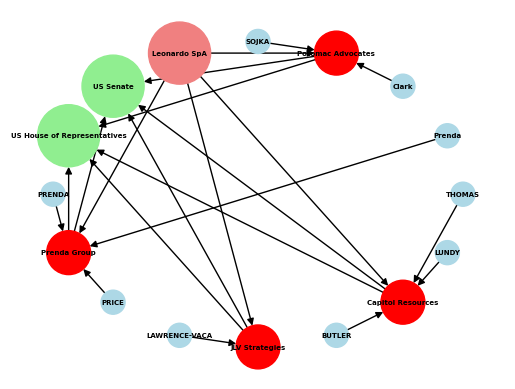

In [212]:
import matplotlib.pyplot as plt

# Create a new graph
#G = nx.Graph()
G = nx.DiGraph()
fig = go.Figure()

lobbyist_nodes = lobbyist_reg[["lobbyist_id", "lobbyist_lastname_std"]].drop_duplicates()
reg_nodes = reg_org[["ultorg"]].drop_duplicates()

reg_agency_congress = reg_agency[(reg_agency["agency"] == "US House of Representatives") | (reg_agency["agency"] == "US Senate")]
agency_nodes = reg_agency_congress[["agency"]].drop_duplicates()

for _, row in lobbyist_reg.iterrows():
    lobbyist_id = row['lobbyist_id']
    reg = row['registrant']
    if(G.has_node(lobbyist_id) == False):
        G.add_node(lobbyist_id, type='lobbyist', label=row['lobbyist_lastname_std'])
    if(G.has_node(reg) == False):
        G.add_node(reg, type='registrant', label=reg)
    G.add_edge(lobbyist_id, reg)

for _, row in reg_org.iterrows():
    ultorg = row['ultorg']
    reg = row['registrant']
    if(G.has_node(ultorg) == False):
        G.add_node(ultorg, type='ultorg', label=ultorg)
    if(G.has_node(reg) == False):
        G.add_node(reg, type='registrant', label=reg)
    G.add_edge(ultorg, reg)

for _, row in reg_agency_congress.iterrows():
    agency = row['agency']
    reg = row['registrant']
    if(G.has_node(agency) == False):
        G.add_node(agency, type='agency', label=agency)
    if(G.has_node(reg) == False):
        G.add_node(reg, type='registant', label=reg)
    G.add_edge(reg, agency, color = 'g')

# Define node colors based on node type
node_colors = []
for node in G.nodes(data=True):
    if node[1]['type'] == 'lobbyist':
        node_colors.append('lightblue')
    elif node[1]['type'] == 'agency':
        node_colors.append('lightgreen')
    elif node[1]['type'] == 'ultorg':
        node_colors.append('lightcoral')
    elif node[1]['type'] == 'registrant':
        node_colors.append('red')

# Draw the graph
#pos = nx.spring_layout(G, seed = 100)
#pos = nx.circular_layout(G)
pos = nx.shell_layout(G)
fig, ax = plt.subplots()
node_sizes = {'lobbyist': 300, 'agency': 2000, 'ultorg': 2000, 'registrant': 1000}
node_size_list = [node_sizes[G.nodes[node]['type']] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_size=node_size_list, node_color=node_colors, font_size=5, font_weight='bold', ax=ax)
#nx.draw(G, pos, node_size=node_size_list, node_color=node_colors, font_weight='bold', ax=ax)
plt.show()


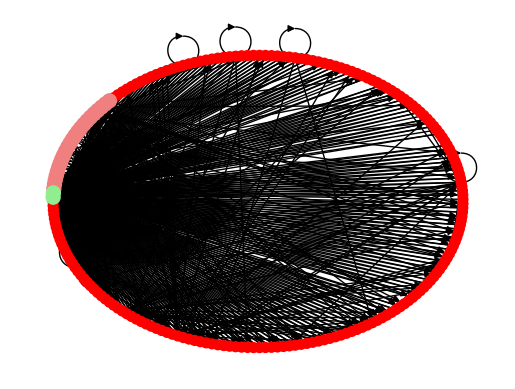

In [202]:
# Remove lobbyist nodes from the graph
lobbyist_ids = lobbyist_nodes['lobbyist_id'].tolist()
G_no_lobbyists = G.copy()
G_no_lobbyists.remove_nodes_from(lobbyist_ids)

# Define node colors for the new graph without lobbyists
node_colors_no_lobbyists = []
for node in G_no_lobbyists.nodes(data=True):
    if node[1]['type'] == 'agency':
        node_colors_no_lobbyists.append('lightgreen')
    elif node[1]['type'] == 'ultorg':
        node_colors_no_lobbyists.append('lightcoral')
    elif node[1]['type'] == 'registrant':
        node_colors_no_lobbyists.append('red')

#out_degrees = dict(G.out_degree())
#nodes_sorted = sorted(G.nodes, key=out_degrees.get, reverse=True)

#top_n_nodes = sorted(out_degrees, key=out_degrees.get, reverse=True)[:20]

# Degree-based node size.
#node_sizes_sorted = [out_degrees[node] * 10 for node in nodes_sorted]

# Node spacing.
#initial_pos = {node: (0.5, 0.5) for node in top_n_nodes}
#pos = nx.spring_layout(G2, pos=initial_pos, fixed=top_n_nodes, k=1.25, scale=1.5, iterations=200)

#edge_widths = [G2[u][v]['weight'] * 0.1 for u, v in G2.edges]

# Draw the new graph without lobbyists
#pos_no_lobbyists = nx.spring_layout(G_no_lobbyists)
pos_no_lobbyists = nx.shell_layout(G_no_lobbyists)
fig_no_lobbyists, ax_no_lobbyists = plt.subplots()
node_sizes = {'agency': 100, 'ultorg': 100, 'registrant': 50}
node_size_list = [node_sizes[G_no_lobbyists.nodes[node]['type']] for node in G_no_lobbyists.nodes()]
nx.draw(G_no_lobbyists, pos_no_lobbyists, node_size=node_size_list, node_color=node_colors_no_lobbyists, font_size=5, font_weight='bold', ax=ax_no_lobbyists)
plt.show()

In [6]:
columns_campfin22_cmtes22 = ['cycle', 'cmteid', 'pacshort', 'affiliate', 'ultorg', 'recipid', 
                    'recipcode', 'feccandid', 'party', 'primcode', 'source', 'sensitive',
                    'foreign', 'active']
columns_campfin22_cmtes22 = dict(enumerate(columns_campfin22_cmtes22))

In [7]:
#usb_path = "/Volumes/red_pny/"
usb_path = "../../../"
df_cmt = pd.read_csv(usb_path + 'CampaignFin22/cmtes22.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'])
df_cmt = df_cmt.rename(columns=columns_campfin22_cmtes22)
df_cmt = df_cmt.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)
df_cmt.head()

,cycle,cmteid,pacshort,affiliate,ultorg,recipid,recipcode,feccandid,party,primcode,source,sensitive,foreign,active
0,2022,C00000059,Hallmark Cards,NaN,Hallmark Cards,C00000059,PB,NaN,NaN,C1400,WAA21,Y,0,1
1,2022,C00000422,American Medical Assn,American Medical Assn,American Medical Assn,C00000422,PB,NaN,NaN,H1100,WAA21,n,0,1
2,2022,C00000489,Teamsters Local 886,Teamsters Union,Teamsters Union,C00000489,PL,NaN,,LT300,WAA21,n,0,1
3,2022,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMIT...,NaN,NaN,C00000547,NaN,NaN,U,NaN,NaN,NaN,0,0
4,2022,C00000729,American Dental Assn,American Dental Assn,American Dental Assn,C00000729,PB,NaN,NaN,H1400,WAA21,n,0,1


In [ ]:
columns_campfin22_cands22 = ['cycle', 'feccandid', 'cid', 'firstlastp', 'party', 'distidrunfor', 
                    'distidcurr', 'currcand', 'cyclecand', 'crpico', 'recipcode', 
                    'nopacs']
columns_campfin22_cands22 = dict(enumerate(columns_campfin22_cands22))

df_cand = pd.read_csv(usb_path + 'CampaignFin22/cands22.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'])
df_cand = df_cand.rename(columns=columns_campfin20_cands20)
df_cand = df_cand.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)
df_cand.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,|2022|,|H0AK00105|,|N00039029|,|Thomas Lamb (3)|,|3|,|AK01|,| |,| |,| |,| |,|3N|,| |
1,|2022|,|H0AL01055|,|N00044245|,|Jerry Carl (R)|,|R|,|AL01|,|AL01|,|Y|,|Y|,|I|,|RW|,| |
2,|2022|,|H0AL01063|,|N00044288|,|Wes Lambert (R)|,|R|,|AL01|,| |,| |,| |,| |,|RN|,| |
3,|2022|,|H0AL01097|,|N00044750|,|James Averhart (D)|,|D|,|AL01|,| |,| |,| |,| |,|DN|,| |
4,|2022|,|H0AL02087|,|N00030768|,|Martha Roby (R)|,|R|,|AL02|,| |,| |,| |,| |,|RN|,| |


In [10]:
columns_campfin22_pacs22 = ['cycle', 'fecrecno', 'pacid', 'cid', 'amount', 'date', 'realcode', 
                            'type', 'di', 'feccandid']
columns_campfin22_pacs22 = dict(enumerate(columns_campfin22_pacs22))

df_pacs = pd.read_csv(usb_path + 'CampaignFin22/pacs22.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'])

df_pacs = df_pacs.rename(columns=columns_campfin22_pacs22)
df_pacs = df_pacs.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)
df_pacs.head()

,cycle,fecrecno,pacid,cid,amount,date,realcode,type,di,feccandid
0,2022,1011020220264924462,C00406124,N00029513,500,10/18/2021,B4000,24K,D,H8IN07184
1,2022,1011320230265253020,C00032979,N00041569,-2500,11/21/2022,Z9600,24K,D,H8IL14174
2,2022,1011320230265254779,C00032979,N00041511,-5000,11/18/2022,Z9600,24K,D,H8MN08043
3,2022,1011320230265254798,C00032979,N00035575,5000,11/03/2022,Z9600,24K,D,H4FL15155
4,2022,1011320230265254809,C00032979,N00041511,4000,11/03/2022,Z9600,24K,D,H8MN08043


In [ ]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20for%20Individual%20Contribution%20Data.htm
columns_campfin22_indivs22 = ['cycle', 'fectransid', 'contribid', 'contrib_last', 'contrib_first', 'recipid', 'orgname', 
                    'ultorg', 'realcode', 'date', 'amount', 'street', 'city', 'state',
                    'zip', 'recipcode', 'type', 'cmteid', 'otherid', 'gender', 'microfilm',
                    'occupation', 'employer', 'source']
columns_campfin22_indivs22 = dict(enumerate(columns_campfin22_indivs22))

df_indiv = pd.read_csv(usb_path + 'CampaignFin22/indivs22.csv', nrows=1000000, on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_indiv = df_indiv.rename(columns=columns_campfin22_indivs22)
df_indiv = df_indiv.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)
df_indiv.head()

/var/folders/g1/9sc25jzn7fdgvxb50169_b9m0000gn/T/ipykernel_61716/462014775.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_indiv = pd.read_csv(usb_path + 'CampaignFin22/indivs22.csv', nrows=1000000, on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')


,cycle,fectransid,contribid,contrib_last,contrib_first,recipid,orgname,ultorg,realcode,date,...,zip,recipcode,type,cmteid,otherid,gender,microfilm,occupation,employer,source
0,2022,4061520221505841534,r0014256510,DILLARD,DANIEL,C00000935,[24T Contribution],,Z9500,08/29/2021,...,78557,DP,24T,C00401224,C00000935,M,202205149504021121,NOT EMPLOYED,NOT EMPLOYED,Rept
1,2022,4061520221505841535,r0015503614,WHITE,SCOTTO,C00633404,[24T Contribution],,Z9500,08/29/2021,...,10701,PI,24T,C00401224,C00633404,M,202205149507911003,NOT EMPLOYED,NOT EMPLOYED,Rept
2,2022,4061520221505841536,p0003861308,DOMINGUEZ,SALLIE,C00632398,[24T Contribution],,Z9500,08/29/2021,...,95011,PI,24T,C00401224,C00632398,F,202205149504046504,HEALTHCARE,MCDONALD FAMILY DENTAL,Rept
3,2022,4061520221505841543,p0003689535,BRADLEY,JANNETTE,C00678839,[24T Contribution],,Z9500,08/29/2021,...,60453,PI,24T,C00401224,C00678839,F,202205149503347140,LIBRARIAN,MEDICAL CENTER,Rept
4,2022,4061520221505841545,q0002181378,BHATT,TANYA,C00580068,[24T Contribution],,Z9500,08/29/2021,...,33141,PI,24T,C00401224,C00580068,F,202205149503225635,MKTG,FRYE FINANCIAL,Rept


In [45]:
reg_org["ultorg"].unique()

array(['Advanced Acoustic Concepts', 'Saab AB',
       'Cerberus Capital Management', 'Ultra Electronics',
       'General Atomics', 'Thales Group', 'Cubic Corp',
       'Curtiss-Wright Corp', 'Association of Old Crows',
       'Advent International', 'Management Services Group',
       'Accipiter Systems', 'Israel Aerospace Industries', 'Ensco Inc',
       'Anduril Industries', 'PeopleTec Inc', 'TCOM LP', 'Elbit Systems',
       'Scientific Research Corp', 'Aspen Systems', 'Kongsberg Gruppen',
       'BE Meyers & Co', 'Leonardo SpA', 'Marotta Controls',
       'Mikros Systems', 'Comrod Inc',
       'Mercer Engineering Research Center', 'Scientific Systems Co',
       'Smartronix Inc', 'L3Harris Technologies', 'Raytheon Technologies',
       'SparkCognition', 'Shield AI'], dtype=object)

In [49]:
df_cmt[df_cmt["ultorg"].isin(reg_org["ultorg"].unique())]#.merge(df_cand.set_index('feccandid'), left_on = "recipid", right_on = "cid", how='inner')

,cycle,cmteid,pacshort,affiliate,ultorg,recipid,recipcode,feccandid,party,primcode,source,sensitive,foreign,active
264,2020,C00035683,Raytheon Technologies,Raytheon Technologies,Raytheon Technologies,C00035683,PB,NaN,NaN,D3000,WAA19,Y,0,1
491,2020,C00097568,Raytheon Technologies,Raytheon Technologies,Raytheon Technologies,C00097568,PB,NaN,NaN,D3000,WAA19,Y,0,1
507,2020,C00100321,L3Harris Technologies,L3Harris Technologies,L3Harris Technologies,C00100321,PB,NaN,NaN,D3000,WAA19,N,0,1
834,2020,C00151787,Cubic Corp,NaN,Cubic Corp,C00151787,PB,NaN,NaN,D3000,WAA17,N,0,1
1058,2020,C00194084,Safeway Inc,Cerberus Capital Management,Cerberus Capital Management,C00194084,PB,NaN,NaN,G2400,WAA19,N,0,1
1187,2020,C00215285,General Atomics,NaN,General Atomics,C00215285,PB,NaN,NaN,D4000,WAA19,Y,0,1
1484,2020,C00275123,Leonardo DRS,NaN,Leonardo SpA,C00275123,PB,NaN,NaN,D3000,WAA19,N,1,1
1895,2020,C00338087,L3Harris Technologies,L3Harris Technologies,L3Harris Technologies,C00338087,PB,NaN,NaN,D3000,WAA19,N,0,1
2171,2020,C00365684,Collins Aerospace,Raytheon Technologies,Raytheon Technologies,C00365684,PB,NaN,,D2000,WAA19,Y,0,1
2748,2020,C00409979,DynCorp International,Cerberus Capital Management,Cerberus Capital Management,C00409979,PB,NaN,NaN,D9000,WAA19,n,0,1


In [12]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20for%20PAC%20to%20Cands%20Data.htm
columns_campfin22_pacs22 = ['cycle', 'fecrecno', 'pacid', 'cid', 'amount', 'date', 'realcode', 
                            'type', 'di', 'feccandid']
columns_campfin22_pacs22 = dict(enumerate(columns_campfin22_pacs22))

df_pacs = pd.read_csv(usb_path + 'CampaignFin22/pacs22.csv', nrows=1000000, on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_pacs = df_pacs.rename(columns=columns_campfin22_pacs22)
df_pacs = df_pacs.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)
df_pacs.head()

,cycle,fecrecno,pacid,cid,amount,date,realcode,type,di,feccandid
0,2022,1011020220264924462,C00406124,N00029513,500,10/18/2021,B4000,24K,D,H8IN07184
1,2022,1011320230265253020,C00032979,N00041569,-2500,11/21/2022,Z9600,24K,D,H8IL14174
2,2022,1011320230265254779,C00032979,N00041511,-5000,11/18/2022,Z9600,24K,D,H8MN08043
3,2022,1011320230265254798,C00032979,N00035575,5000,11/03/2022,Z9600,24K,D,H4FL15155
4,2022,1011320230265254809,C00032979,N00041511,4000,11/03/2022,Z9600,24K,D,H8MN08043


In [14]:
raytheon = df_pacs[df_pacs["pacid"] == "C00035683"]
raytheon.head()

,cycle,fecrecno,pacid,cid,amount,date,realcode,type,di,feccandid


In [17]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20PAC%20to%20PAC%20Data.htm
columns_campfin22_pac_other22 = ['cycle', 'fecrecno', 'filerid', 'donorcmte', 'contriblendtrans', 'city', 'state', 
                            'zip', 'fecoccemp', 'primcode', 'date', 'amount', 'recipid', 'party', 'otherid',
                            'recipcode', 'recipprimcode', 'amend', 'report', 'pg', 'microfilm', 'type',
                            'realcode', 'source']
columns_campfin22_pac_other22 = dict(enumerate(columns_campfin22_pac_other22))


df_pacs_other = pd.read_csv(usb_path + 'CampaignFin22/pac_other22.csv', nrows=1000000, on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_pacs_other = df_pacs_other.rename(columns=columns_campfin22_pac_other22)
df_pacs_other = df_pacs_other.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)
df_pacs_other.head()

/var/folders/g1/9sc25jzn7fdgvxb50169_b9m0000gn/T/ipykernel_61716/2962923658.py:10: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pacs_other = pd.read_csv(usb_path + 'CampaignFin22/pac_other22.csv', nrows=1000000, on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')


,cycle,fecrecno,filerid,donorcmte,contriblendtrans,city,state,zip,fecoccemp,primcode,...,otherid,recipcode,recipprimcode,amend,report,pg,microfilm,type,realcode,source
0,2022,1011320230265253021,C00032979,Teamsters Union,BOHANNAN VICTORY FUND,IOWA CITY,IA,52245,NaN,LT300,...,C00811059,DP,Z4200,A,30G,P,202212089550408190,24K,LT300,PAC
1,2022,1011320230265254787,C00032979,Teamsters Union,WARNOCK VICTORY FUND,WASHINGTON,DC,20003,NaN,LT300,...,C00740597,DP,Z4200,A,30G,P,202212089550408210,24K,LT300,PAC
2,2022,1011320230265254797,C00032979,Teamsters Union,BLUE POWER PAC,COLLINSWOOD,NJ,08108,NaN,LT300,...,C00575894,PI,J2100,A,30G,P,202212089550408207,24K,LT300,PAC
3,2022,1011320230265254799,C00032979,Teamsters Union,COMMONWEALTH PAC,MERRIFIELD,VA,22116,NaN,LT300,...,C00498931,PI,J2100,A,30G,P,202212089550408208,24K,LT300,PAC
4,2022,1011320230265254826,C00032979,Teamsters Union,RHODE ISLAND DEMOCRATIC STATE CMTE,PROVIDENCE,RI,92940,NaN,LT300,...,C00136200,DP,Z5200,A,30G,P,202212089550408209,24K,LT300,PAC


In [21]:
df_cmt[df_cmt["cmteid"] == "C00406124"]

,cycle,cmteid,pacshort,affiliate,ultorg,recipid,recipcode,feccandid,party,primcode,source,sensitive,foreign,active
2503,2022,C00406124,Hanson Professional Services,NaN,Hanson Professional Services,C00406124,PB,NaN,NaN,B4000,WAA21,N,0,1
